In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

In [2]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

#
  # 1/Mpc
#
# Cosmological parameters and other CLASS parameters
#
common_settings = {# we need to set the output field to something although
                   # the really releveant outpout here will be set with 'k_output_values'
                   'output':'tCl,pCl,lCl,mPk,mTk',
                   # value of k we want to polot in [1/Mpc]
                   'k_output_values': 0.01,
                   # LambdaCDM parameters
                   'Omega_Lambda':0, 
                   'Omega_fld':0,
                   'Omega_smg' : -1,
                   'gravity_model' :'propto_omega',
                   # k, b, m, t
                   #'parameters_smg' :'1., 0., 0., 0., 1.',
                   #'parameters_smg' :'1., 0.625, 0., 0., 1.',
                   #'parameters_smg' :'1., 1.25, 0., 0., 1.',
                   'parameters_smg' :'1., 0., 0.625, 0., 1.',
                   #'parameters_smg' :'1., 0., 1.25, 0., 1.',
                   'expansion_model' :'lcdm',
                   'expansion_smg' : 0.5,
                   'output_background_smg' :10,
                   'skip_stability_tests_smg' : 'no',
                   'cs2_safe_smg' : 0.,
                   'D_safe_smg' : 0.,
                   'ct2_safe_smg' :0.,
                   'M2_safe_smg' : 0.,
                   'a_min_stability_test_smg' : 0.0001,
    
    
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'hubble_evolution' : 'y',
                   'hubble_friction' :3.,
                   'pert_initial_conditions_smg' : 'ext_field_attr',
                   
                   # other options and settings
                   'pert_ic_ini_z_ref_smg' : 1e10,    
                   'pert_ic_tolerance_smg' : 2e-2, 
                   'pert_ic_regulator_smg' : 1e-15,
                   'pert_qs_ic_tolerance_test_smg' : 10,
                   'method_qs_smg' : 'fully_dynamic',
                   'z_fd_qs_smg' : 10.,
                   'trigger_mass_qs_smg' : 1.e3,
                   'trigger_rad_qs_smg' : 1.e3, 
                   'eps_s_qs_smg' : 0.01,
                   'n_min_qs_smg' : 1e2,
                   'n_max_qs_smg' : 1e4,
                   'start_small_k_at_tau_c_over_tau_h' : 1e-4,
                   'start_large_k_at_tau_h_over_tau_k' : 1e-4,
                   'perturb_sampling_stepsize' : 0.05,
                   'l_logstep' : 1.045,
                   'l_linstep' : 50,
                   'gauge':'synchronous'}  

In [3]:
# call CLASS
#
M = Class()
M.set(common_settings)
M.compute()

In [4]:
transfer = M.get_transfer() #Geff_smg(k) para z fixo
print(transfer.keys())

dict_keys(['k (h/Mpc)', 'd_g', 'd_b', 'd_cdm', 'd_ur', 'd_tot', 'phi', 'psi', 'Geff_smg'])


In [5]:
all_k = M.get_perturbations() #Geff_smg(a) para k fixo
print(all_k['scalar'][0].keys())

dict_keys(['tau [Mpc]', 'a', 'delta_g', 'theta_g', 'shear_g', 'pol0_g', 'pol1_g', 'pol2_g', 'delta_b', 'theta_b', 'psi', 'phi', 'delta_ur', 'theta_ur', 'shear_ur', 'delta_cdm', 'theta_cdm', 'V_x_smg', 'V_x_prime_smg', 'h_prime', 'eta', 'Geff_smg'])


In [6]:
perturb = all_k['scalar'][0] 
perturb['Geff_smg']

array([1.        , 1.        , 1.        , ..., 0.97157332, 0.97155139,
       0.97154343])

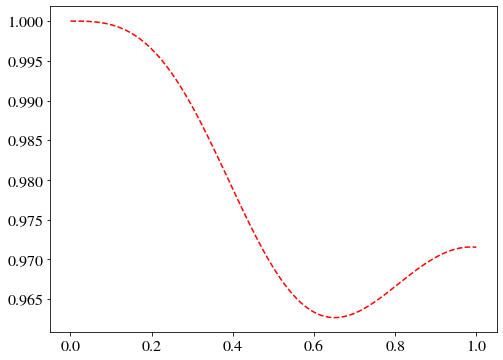

In [7]:
plt.plot(perturb['a'], perturb['Geff_smg'], 'r--')
plt.show()

In [8]:
back = M.get_background() #keys disponiveis do background
print(back.keys())

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_ur', '(.)rho_crit', 'gr.fac. D', 'gr.fac. f', '(.)rho_smg', '(.)p_smg', 'M*^2_smg', 'D_M*^2_smg', 'kineticity_smg', 'braiding_smg', 'tensor_excess_smg', 'Mpl_running_smg', 'c_s^2', 'kin (D)', 'kineticity_prime_smg', 'braiding_prime_smg', 'lambda_1', 'lambda_2', 'lambda_3', 'lambda_4', 'lambda_5', 'lambda_6', 'lambda_7', 'lambda_8', 'lambda_9', 'lambda_10', 'lambda_11', 'lambda_2_p', 'lambda_8_p', 'lambda_9_p', 'lambda_11_p', 'cs2num', 'cs2num_p', 'H_prime', 'H_prime_prime', 'rho_m'])


In [9]:
transfer['Geff_smg']

array([0.7849374 , 0.78609405, 0.78810671, 0.79093727, 0.79453479,
       0.79883746, 0.80377479, 0.80927001, 0.81524242, 0.82160964,
       0.82828975, 0.83520298, 0.84227326, 0.84942937, 0.85660569,
       0.86374283, 0.87078783, 0.87769425, 0.88442202, 0.89093719,
       0.89721158, 0.90322238, 0.9089517 , 0.91438615, 0.91951636,
       0.92433666, 0.92884462, 0.93304078, 0.93692832, 0.94051283,
       0.94380206, 0.94680567, 0.94953509, 0.95200327, 0.95422447,
       0.95621401, 0.95798803, 0.95956317, 0.9609563 , 0.96218421,
       0.96326332, 0.96420938, 0.96503732, 0.96576102, 0.96639321,
       0.96694546, 0.96742811, 0.96785033, 0.9682202 , 0.96854477,
       0.96883015, 0.96908164, 0.9693038 , 0.96950054, 0.96967523,
       0.96983076, 0.96996959, 0.97009386, 0.97020539, 0.97030575,
       0.9703963 , 0.97047819, 0.97055244, 0.97061992, 0.97068139,
       0.97073752, 0.97078887, 0.97083596, 0.97087923, 0.97091906,
       0.97095579, 0.97098974, 0.97102116, 0.97105029, 0.97107

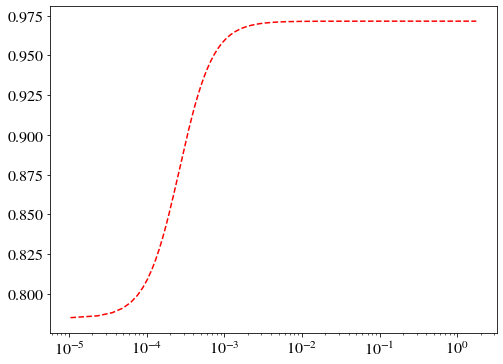

In [10]:
plt.plot(transfer['k (h/Mpc)'], transfer['Geff_smg'], 'r--')
plt.xscale('log')
plt.show()